# Intro Of This Notebook

Epilepsy is a severe neurological disorder that manifests as a prevalent global health issue. It results from abnormal electrical discharges in the brain, leading to clinical symptoms. Epileptic seizures, representing the most common positive indicators of brain disturbance, categorize epilepsy as a primary brain disorder. The leading causes of epilepsy include vascular factors, traumatic incidents, infections, brain abscesses, tumors, nutritional deficiencies, pyridoxine deficiency, and calcium metabolism disorders. To enhance our understanding of the mechanisms causing epileptic disorders, ongoing research is essential. The diagnosis of epilepsy relies significantly on the electroencephalogram (EEG), a critical tool for accurately classifying different forms of epilepsy and facilitating the evaluation and treatment of neurophysiological disorders.

## Method Selection

I implemented the dataset using Support Vector Machines (SVM), Deep Neural Networks (DNN), and Convolutional Neural Networks (CNN), and I obtained the results for each of them.

## About Dataset

This dataset is a pre-processed and re-structured/reshaped version of a very commonly used dataset featuring epileptic seizure detection.

## Attribute Information

The original dataset, as referenced, comprises 5 folders, each containing 100 files, with each file representing the brain activity recording of a single subject. These recordings span 23.6 seconds and are sampled into 4097 data points. Consequently, there are a total of 500 individuals, each contributing 4097 data points for a duration of 23.5 seconds.

To enhance the dataset's organization, we partitioned and shuffled every 4097 data points into 23 chunks. Each chunk consists of 178 data points, representing a 1-second interval. Therefore, the dataset now comprises 11,500 entries (rows), each containing 178 data points for 1 second (columns). The final column denotes the label "y" with values {1, 2, 3, 4, 5}.

In summary, the response variable "y" is found in column 179, while the explanatory variables X1, X2, …, X178 provide the EEG recording values at different time points.

## y Definition

The variable "y" denotes the category of the 178-dimensional input vector and specifically takes values in {1, 2, 3, 4, 5}, each corresponding to different conditions:

- 5: Eyes open, indicating the EEG signal recording when the patient had their eyes open.
- 4: Eyes closed, representing the EEG signal recording when the patient had their eyes closed.
- 3: Identification of the tumor region in the brain, recording EEG activity from the healthy brain area.
- 2: EEG recorded from the area where the tumor was located.
- 1: Recording of seizure activity.

Subjects falling into classes 2, 3, 4, and 5 are those without epileptic seizures, while subjects in class 1 experience epileptic seizures. Despite the existence of five classes, many authors have simplified the classification task to binary, focusing on class 1 (Epileptic seizure) versus the rest. The motivation behind creating this dataset version in a .csv format is to streamline data access.

## Reference of datastet

This Dataset collect from UCI Machine Learning Repository (from the University of Bonn).

## Import Libraries

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Load the data

In [2]:
data = pd.read_csv('Epileptic Seizure Recognition.csv')

## Show the dataset

In [3]:
data.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


# SVM Model

In [4]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1:].values
y[y > 1] = 0  # Convert multi-class to binary

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate and print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

C:\Users\hosei\anaconda3\envs\tensorjoon\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix:
[[2284    1]
 [ 518   72]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      2285
           1       0.99      0.12      0.22       590

    accuracy                           0.82      2875
   macro avg       0.90      0.56      0.56      2875
weighted avg       0.85      0.82      0.76      2875

Accuracy: 0.8194782608695652


# DNN Model

In [29]:
X = data.iloc[:,1:-1].values
X.shape

y = data.iloc[:,-1:].values
y[y>1] = 0
y.shape

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,shuffle=True)
X_train.shape,y_test.shape

def denseBlock(dims,inp) :
    x = tf.keras.layers.BatchNormalization() (inp)
    x = tf.keras.layers.Dense(dims,activation=tf.keras.layers.LeakyReLU(0.2)) (x)
    x = tf.keras.layers.Dropout(0.4) (x)
    x = tf.keras.layers.Dense(dims,activation=tf.keras.layers.LeakyReLU(0.2)) (x)
    x = tf.keras.layers.Dropout(0.4) (x)
    x = tf.keras.layers.Dense(dims,activation=tf.keras.layers.LeakyReLU(0.2)) (x)
    x = tf.keras.layers.Dropout(0.4) (x)
    x = tf.keras.layers.Dense(178,activation=tf.keras.layers.LeakyReLU(0.2)) (x)
    return x

inp = tf.keras.layers.Input(shape=(178,),name='input')
x1 = denseBlock(256,inp)
x2 = denseBlock(512,inp)
x3 = denseBlock(1024,inp)
x = tf.keras.layers.Concatenate()([x1,x2,x3])
x = tf.keras.layers.Dense(128,activation=tf.keras.layers.LeakyReLU(0.2)) (x)
out = tf.keras.layers.Dense(1,activation='sigmoid',name='output') (x)

model = tf.keras.models.Model(inp,out)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(X_train)
x_test_scaled = sc.transform(X_test)
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(1e-4),metrics=['accuracy'])
model.fit(X_train,y_train,epochs=150,batch_size=128,validation_split=0.2)

model.evaluate(X_test,y_test)

# Predict on the test set
y_pred = model.predict(x_test_scaled)

# Convert predicted probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate and print classification report
class_report = classification_report(y_test, y_pred_binary)
print("Classification Report:")
print(class_report)

# Calculate and print accuracy
accuracy2 = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy2)

# Extract the number of seizure and non-seizure cases from the confusion matrix
seizure_cases = conf_matrix[1, 1]  # True Positives
non_seizure_cases = conf_matrix[0, 0]  # True Negatives

Epoch 1/150
54/54 [==============================] - 10s 68ms/step - loss: 0.6377 - accuracy: 0.7193 - val_loss: 0.4593 - val_accuracy: 0.8730
Epoch 2/150
54/54 [==============================] - 3s 54ms/step - loss: 0.4177 - accuracy: 0.9057 - val_loss: 0.2373 - val_accuracy: 0.9565
Epoch 3/150
54/54 [==============================] - 3s 54ms/step - loss: 0.2484 - accuracy: 0.9359 - val_loss: 0.1495 - val_accuracy: 0.9693
Epoch 4/150
54/54 [==============================] - 3s 55ms/step - loss: 0.1747 - accuracy: 0.9519 - val_loss: 0.1284 - val_accuracy: 0.9664
Epoch 5/150
54/54 [==============================] - 3s 54ms/step - loss: 0.1412 - accuracy: 0.9575 - val_loss: 0.1303 - val_accuracy: 0.9681
Epoch 6/150
54/54 [==============================] - 3s 55ms/step - loss: 0.1184 - accuracy: 0.9623 - val_loss: 0.1260 - val_accuracy: 0.9670
Epoch 7/150
54/54 [==============================] - 3s 54ms/step - loss: 0.1110 - accuracy: 0.9680 - val_loss: 0.0987 - val_accuracy: 0.9757
Epoch

54/54 [==============================] - 2s 31ms/step - loss: 0.0282 - accuracy: 0.9893 - val_loss: 0.0980 - val_accuracy: 0.9757
Epoch 59/150
54/54 [==============================] - 2s 31ms/step - loss: 0.0302 - accuracy: 0.9907 - val_loss: 0.1232 - val_accuracy: 0.9670
Epoch 60/150
54/54 [==============================] - 2s 31ms/step - loss: 0.0294 - accuracy: 0.9909 - val_loss: 0.1074 - val_accuracy: 0.9733
Epoch 61/150
54/54 [==============================] - 2s 31ms/step - loss: 0.0343 - accuracy: 0.9880 - val_loss: 0.1034 - val_accuracy: 0.9751
Epoch 62/150
54/54 [==============================] - 2s 32ms/step - loss: 0.0285 - accuracy: 0.9888 - val_loss: 0.1147 - val_accuracy: 0.9704
Epoch 63/150
54/54 [==============================] - 2s 32ms/step - loss: 0.0351 - accuracy: 0.9868 - val_loss: 0.0912 - val_accuracy: 0.9751
Epoch 64/150
54/54 [==============================] - 2s 33ms/step - loss: 0.0356 - accuracy: 0.9871 - val_loss: 0.1028 - val_accuracy: 0.9739
Epoch 65/150

54/54 [==============================] - 2s 38ms/step - loss: 0.0178 - accuracy: 0.9943 - val_loss: 0.1199 - val_accuracy: 0.9733
Epoch 116/150
54/54 [==============================] - 2s 34ms/step - loss: 0.0169 - accuracy: 0.9946 - val_loss: 0.1200 - val_accuracy: 0.9728
Epoch 117/150
54/54 [==============================] - 2s 32ms/step - loss: 0.0180 - accuracy: 0.9936 - val_loss: 0.1364 - val_accuracy: 0.9687
Epoch 118/150
54/54 [==============================] - 2s 31ms/step - loss: 0.0143 - accuracy: 0.9957 - val_loss: 0.1262 - val_accuracy: 0.9745
Epoch 119/150
54/54 [==============================] - 2s 35ms/step - loss: 0.0141 - accuracy: 0.9945 - val_loss: 0.1397 - val_accuracy: 0.9728
Epoch 120/150
54/54 [==============================] - 2s 32ms/step - loss: 0.0146 - accuracy: 0.9949 - val_loss: 0.1399 - val_accuracy: 0.9722
Epoch 121/150
54/54 [==============================] - 2s 32ms/step - loss: 0.0121 - accuracy: 0.9962 - val_loss: 0.1546 - val_accuracy: 0.9687
Epoch 

C:\Users\hosei\anaconda3\envs\tensorjoon\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hosei\anaconda3\envs\tensorjoon\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hosei\anaconda3\envs\tensorjoon\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# CNN Model

In [30]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1:].values
y[y > 1] = 0  # Convert multi-class to binary

## Split the data into training and testing sets

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)

## Standardize the data

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Reshape the data for CNN

In [33]:
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

## Build the CNN model

In [34]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

## Compile the model

In [35]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Train the model

In [36]:
history = model.fit(X_train_reshaped, y_train, epochs=150, batch_size=128, validation_split=0.2)

Epoch 1/150
54/54 [==============================] - 2s 23ms/step - loss: 0.3110 - accuracy: 0.8941 - val_loss: 0.1396 - val_accuracy: 0.9484
Epoch 2/150
54/54 [==============================] - 1s 18ms/step - loss: 0.1150 - accuracy: 0.9520 - val_loss: 0.1068 - val_accuracy: 0.9536
Epoch 3/150
54/54 [==============================] - 1s 19ms/step - loss: 0.1054 - accuracy: 0.9541 - val_loss: 0.1199 - val_accuracy: 0.9501
Epoch 4/150
54/54 [==============================] - 1s 19ms/step - loss: 0.0947 - accuracy: 0.9594 - val_loss: 0.0994 - val_accuracy: 0.9571
Epoch 5/150
54/54 [==============================] - 1s 18ms/step - loss: 0.0889 - accuracy: 0.9630 - val_loss: 0.1003 - val_accuracy: 0.9565
Epoch 6/150
54/54 [==============================] - 1s 18ms/step - loss: 0.0811 - accuracy: 0.9668 - val_loss: 0.1017 - val_accuracy: 0.9559
Epoch 7/150
54/54 [==============================] - 1s 19ms/step - loss: 0.0757 - accuracy: 0.9683 - val_loss: 0.0897 - val_accuracy: 0.9670
Epoch 

54/54 [==============================] - 1s 19ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.1145 - val_accuracy: 0.9820
Epoch 59/150
54/54 [==============================] - 1s 21ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.1360 - val_accuracy: 0.9791
Epoch 60/150
54/54 [==============================] - 1s 20ms/step - loss: 0.0022 - accuracy: 0.9990 - val_loss: 0.1204 - val_accuracy: 0.9809
Epoch 61/150
54/54 [==============================] - 1s 19ms/step - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.1134 - val_accuracy: 0.9826
Epoch 62/150
54/54 [==============================] - 1s 21ms/step - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.1251 - val_accuracy: 0.9809
Epoch 63/150
54/54 [==============================] - 1s 20ms/step - loss: 0.0037 - accuracy: 0.9986 - val_loss: 0.1061 - val_accuracy: 0.9843
Epoch 64/150
54/54 [==============================] - 1s 20ms/step - loss: 0.0036 - accuracy: 0.9991 - val_loss: 0.1563 - val_accuracy: 0.9780
Epoch 65/150

54/54 [==============================] - 1s 23ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.1863 - val_accuracy: 0.9820
Epoch 116/150
54/54 [==============================] - 1s 23ms/step - loss: 0.0016 - accuracy: 0.9994 - val_loss: 0.1742 - val_accuracy: 0.9826
Epoch 117/150
54/54 [==============================] - 1s 23ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.1723 - val_accuracy: 0.9820
Epoch 118/150
54/54 [==============================] - 1s 23ms/step - loss: 0.0015 - accuracy: 0.9999 - val_loss: 0.1702 - val_accuracy: 0.9814
Epoch 119/150
54/54 [==============================] - 1s 23ms/step - loss: 6.6855e-04 - accuracy: 0.9997 - val_loss: 0.1701 - val_accuracy: 0.9814
Epoch 120/150
54/54 [==============================] - 1s 23ms/step - loss: 4.9339e-04 - accuracy: 1.0000 - val_loss: 0.1756 - val_accuracy: 0.9826
Epoch 121/150
54/54 [==============================] - 1s 25ms/step - loss: 4.8042e-04 - accuracy: 1.0000 - val_loss: 0.1947 - val_accuracy: 0

## Evaluate the model

In [37]:
y_pred = model.predict(X_test_reshaped)
y_pred_binary = (y_pred > 0.5).astype(int)

90/90 [==============================] - 1s 5ms/step


## Calculate and print the confusion matrix

In [38]:
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[2264   21]
 [  29  561]]


## Calculate and print classification report

In [39]:
class_report = classification_report(y_test, y_pred_binary)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2285
           1       0.96      0.95      0.96       590

    accuracy                           0.98      2875
   macro avg       0.98      0.97      0.97      2875
weighted avg       0.98      0.98      0.98      2875



## Calculate and print accuracy

In [40]:
accuracy3 = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

Accuracy: 0.8194782608695652


## Plot training history

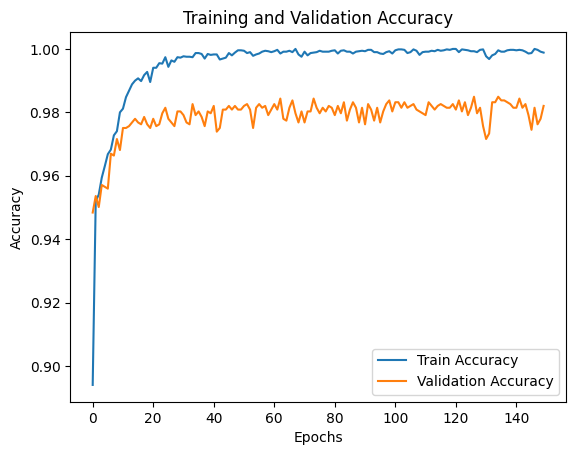

In [41]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Comparison between the Models

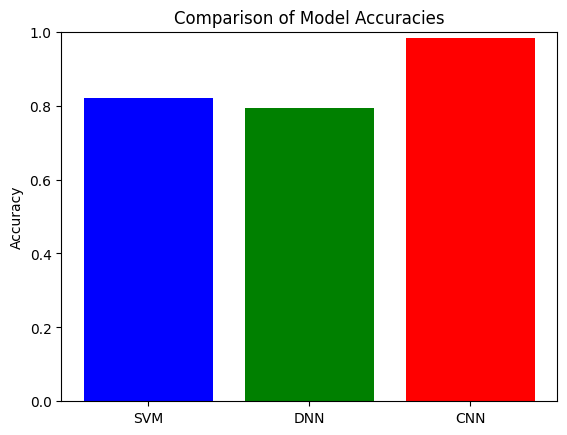

In [42]:
import matplotlib.pyplot as plt


svm_accuracy = accuracy  #  accuracy variable for SVM
dnn_accuracy = accuracy2  # accuracy variable for DNN
cnn_accuracy = accuracy3  # accuracy variable for CNN

# Plotting
labels = ['SVM', 'DNN', 'CNN']
accuracies = [svm_accuracy, dnn_accuracy, cnn_accuracy]

plt.bar(labels, accuracies, color=['blue', 'green', 'red'])
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim([0, 1])  # Set the y-axis limit between 0 and 1 for accuracy
plt.show()


Towards the end, due to the rapid response, I came to the realization that employing **SVM** is more advantageous for swift **detection**. However, for heightened accuracy and **prediction** scenarios, CNN prove to be more effective. Consequently, my decision is to utilize  **CNN** for this specific dataset.